# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [4]:
#print the unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


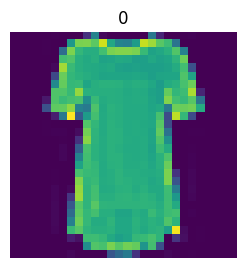

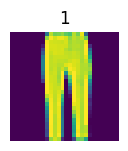

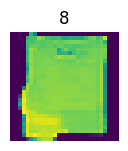

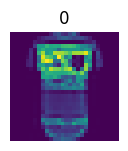

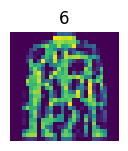

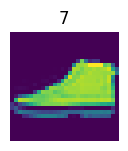

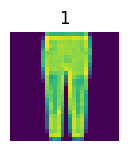

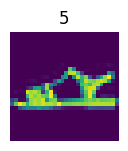

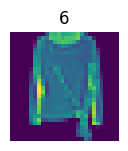

In [5]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(15,10))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  plt.imshow(X_train[index]) 
  #edit2__add_label_here
  plt.title(Y_train[index])
  plt.axis('off')
  plt.show()
 



###These number denotes the respective object
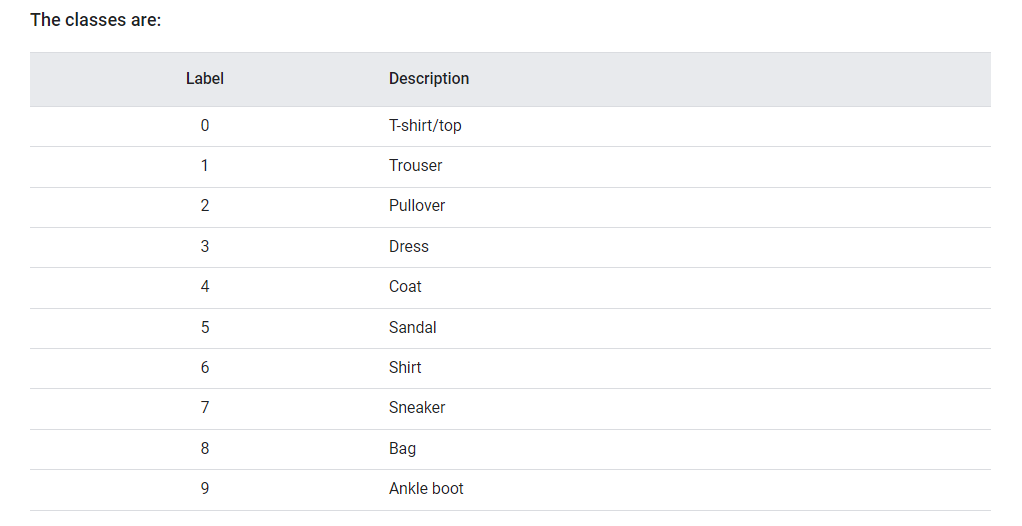

In [20]:
# Find the count of each type of class
import pandas as pd
count = pd.Series(Y_train).value_counts()
print(count)

6    826
4    810
9    810
8    803
7    802
3    800
2    795
5    789
1    786
0    779
dtype: int64


In [37]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(96,activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
#model.add(tf.keras.layers.Dense(16,activation="relu"))
#__output__layer with correct output shape and activation function[ google if finding this difficult to get]

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [38]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate =0.001),
                  loss ="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

In [39]:
#Lets analyse the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 96)                12384     
                                                                 
 dense_24 (Dense)            (None, 64)                6208      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 121,482
Trainable params: 121,482
Non-tr

###What is the number of trainable parameters in the model?

In [ ]:
""" 
[objective] Write the answer here: 121,482
"""

' \n[objective] Write the answer here: 109,894\n'

In [41]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8712 - val_loss: 0.6806 - val_accuracy: 0.7800
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 0.8750 - val_loss: 0.6977 - val_accuracy: 0.7719
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8805 - val_loss: 0.6890 - val_accuracy: 0.7788
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8805 - val_loss: 0.7099 - val_accuracy: 0.7837
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8823 - val_loss: 0.7340 - val_accuracy: 0.7769
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8845 - val_loss: 0.6928 - val_accuracy: 0.7763
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8864 - val_loss: 0.7108 - val_accuracy: 0.7769
Epoch 

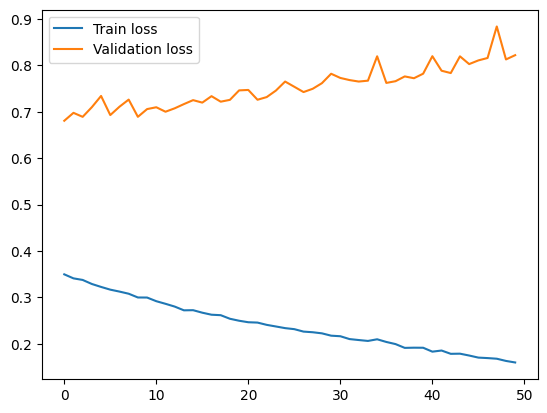

In [42]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [46]:
"""
[Under 100 words] Write your answer here: 
After every epoch model memorises the information of the training set to the point where it degrades its performance on the validation set. Due to overfitting, the loss in this case is greater on the validation data than on the training data.

"""

'\n[Under 100 words] Write your answer here: \nAfter every epoch model memorises the information of the training set to the point where it degrades its performance on the validation set. Due to overfitting, the loss in this case is greater on the validation data than on the training data.\n\n'

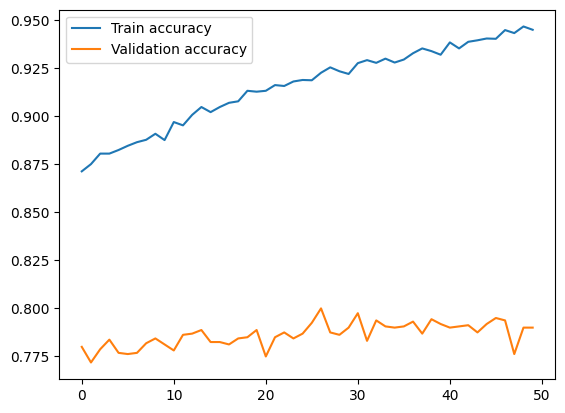

In [43]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [51]:
"""
[Under 100 words] Write your answer here:
As I mentioned above the model memorizes the train data so much that it's accuracy is getting almost near to 1 and while will not much change on the validation data.
"""

"\n[Under 100 words] Write your answer here:\nAs I mentioned above the model memorizes the train data so much that it's accuracy is getting almost near to 1 and while will not much change on the validation data.\n"

In [47]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Y_pred = np.argmax(Y_predicted , axis = 1)

63/63 [==============================] - 0s 1ms/step


In [48]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7265306517532253

In [49]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [50]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)
print(model.layers[5].kernel.shape)

(128, 96)
(96, 64)
(64, 32)
(32, 10)


In [55]:
# Does that satisfied the matrix multiplication math discussed earlier
'''Yes It is evident that each kernel has the shape m x n, where m represents the number of neurons in the layer before it and n represents the number of neurons in the layer in front of it. As a result, when the row of the 1 x m activations from the previous layer is multiplied by this mxn Kernel matrix, we receive 1 x n outputs that are combined with bias to produce n activations for the output layer.'''

'Yes It is evident that each kernel has the shape m x n, where m represents the number of neurons in the layer before it and n represents the number of neurons in the layer in front of it. As a result, when the row of the 1 x m activations from the previous layer is multiplied by this mxn Kernel matrix, we receive 1 x n outputs that are combined with bias to produce n activations for the output layer.'